In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
sns.set_theme(style="ticks", color_codes=True)
from tqdm.notebook import tqdm, trange
import time

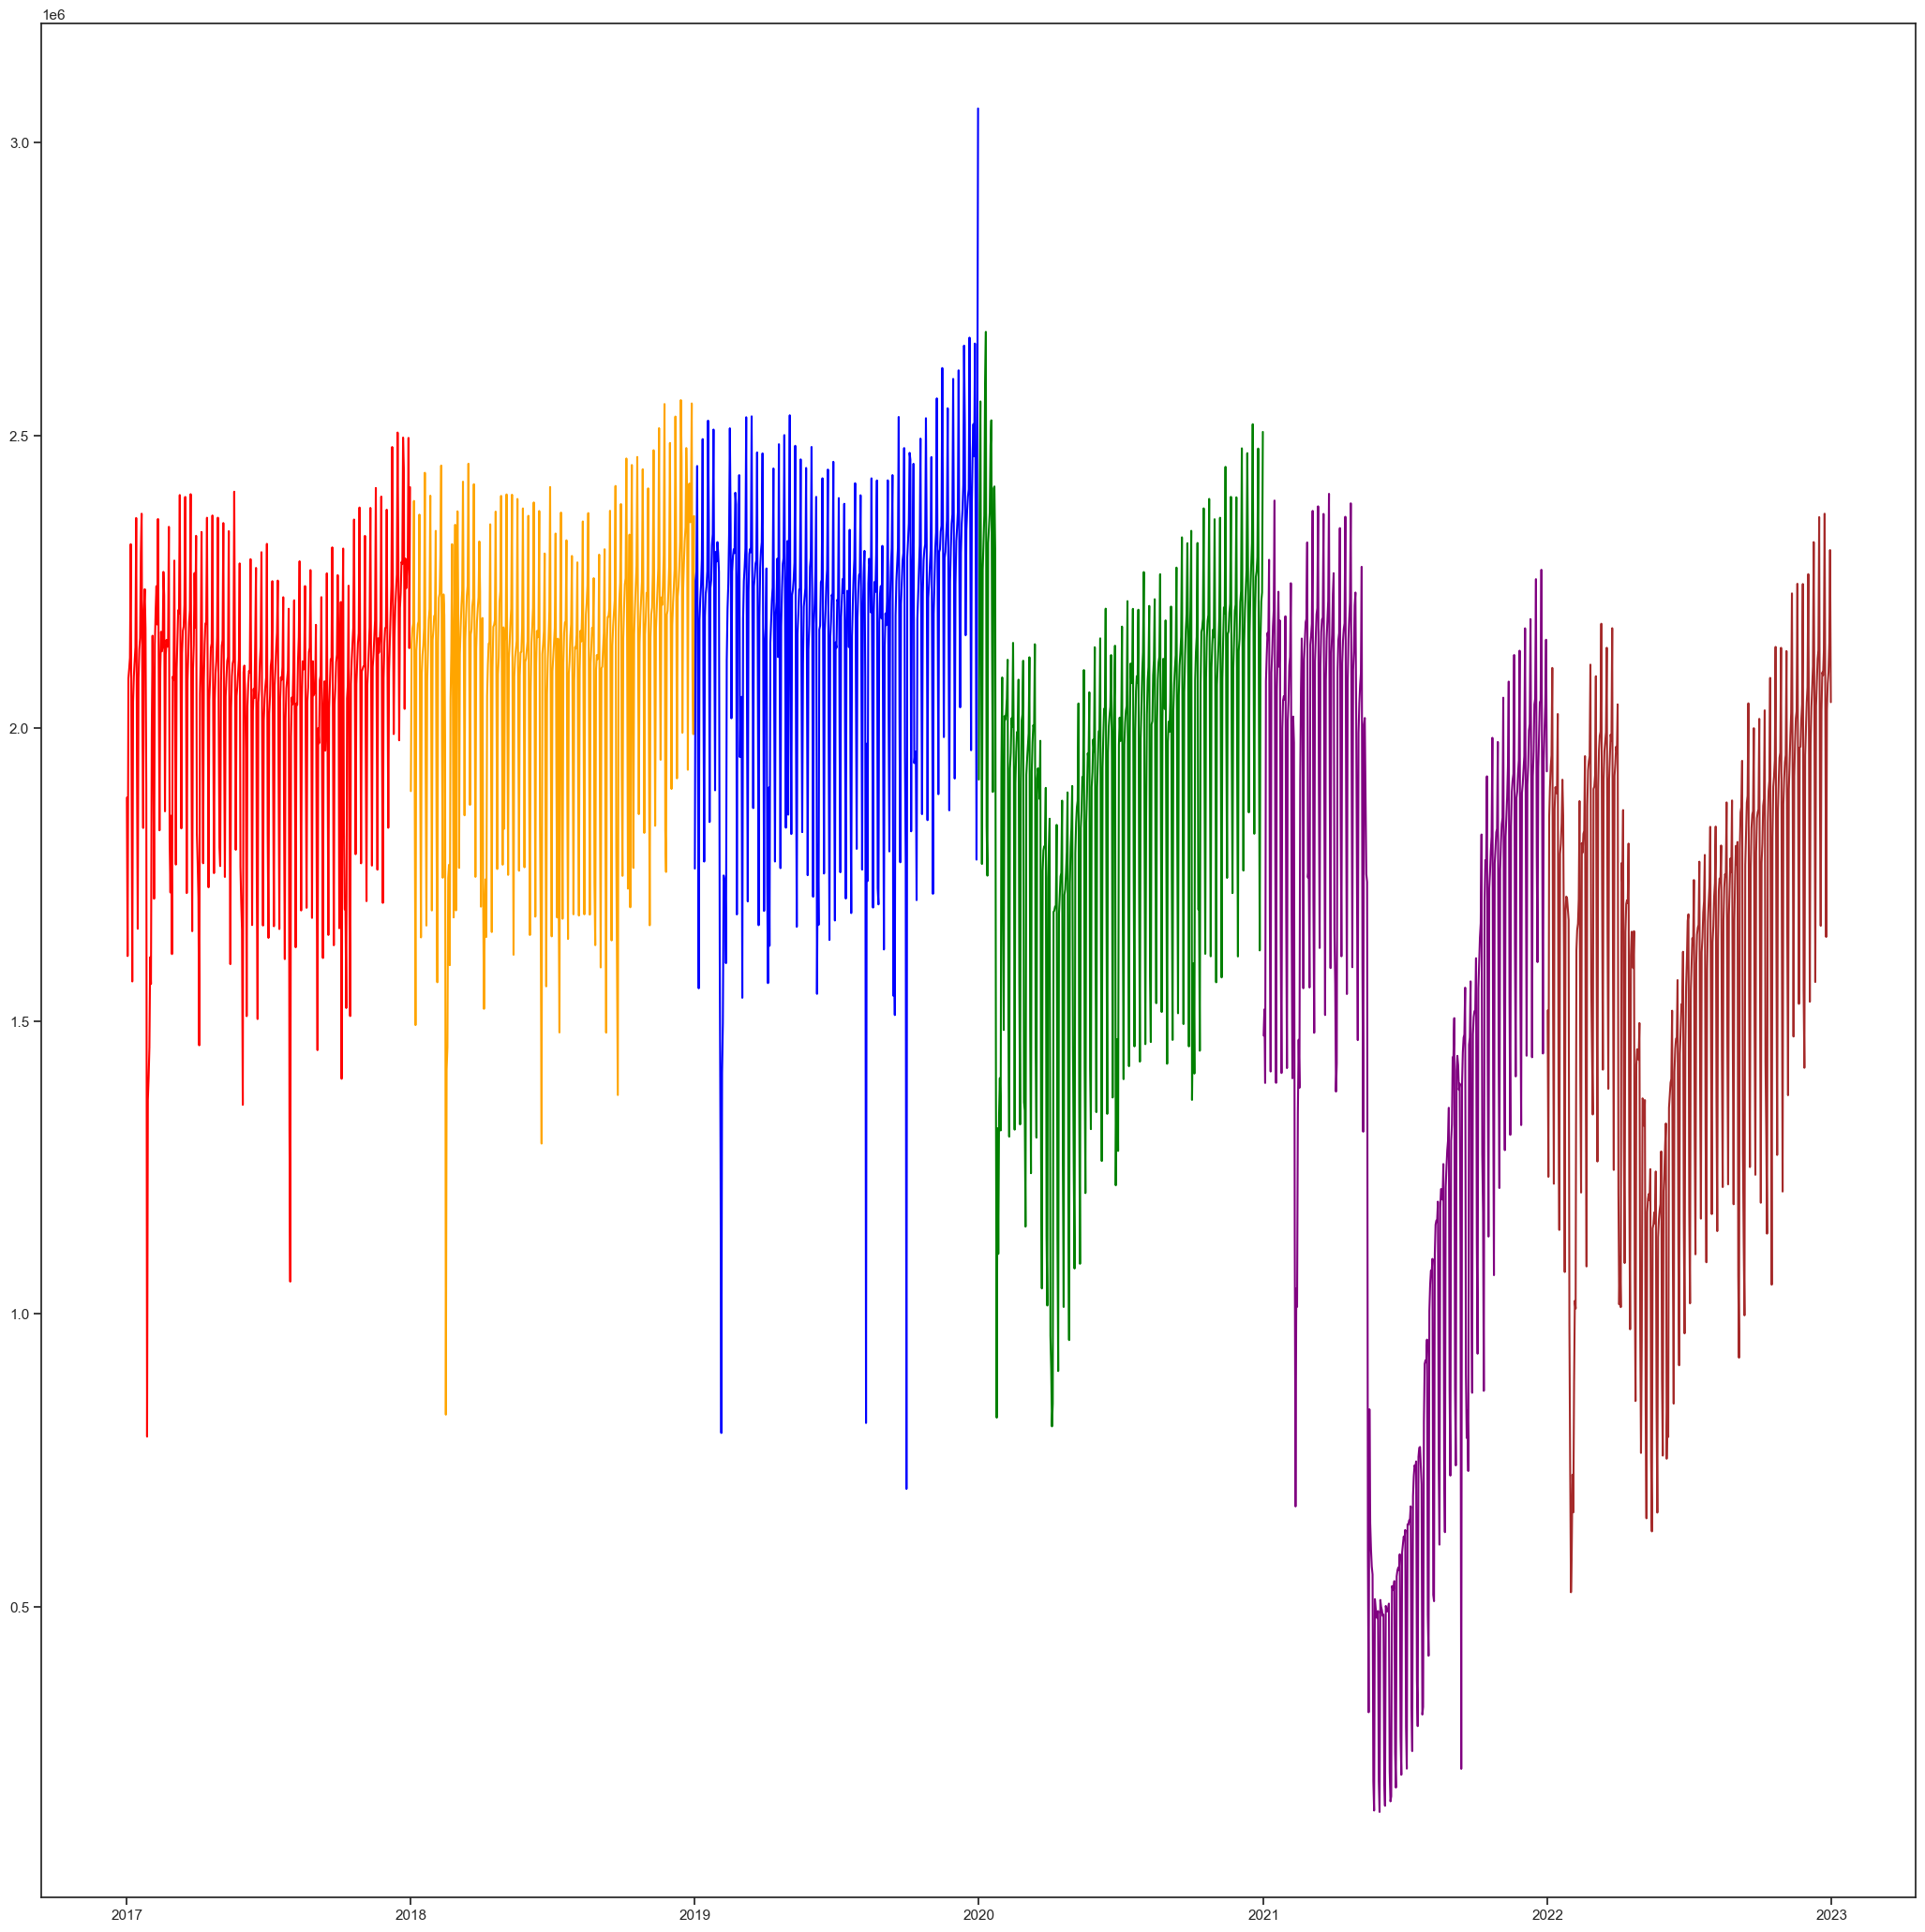

In [47]:
# import matplotlib.pyplot as plt
# import pandas as pd

# fig = plt.figure(figsize=(20, 20))
# ax1 = fig.add_axes([0, 0, 1, 1])

# # 將 Date 欄位轉換為日期格式
# ppl_every_day_all['Date'] = pd.to_datetime(ppl_every_day_all['Date'])

# # 建立顏色映射
# color_map = {2017: 'red', 2018: 'orange', 2019: 'blue', 2020: 'green', 2021: 'purple', 2022: 'brown'}

# # 逐年繪製線條
# for year, color in color_map.items():
#     year_data = ppl_every_day_all[ppl_every_day_all['Date'].dt.year == year]
#     ax1.plot(year_data['Date'], year_data['CrowdFlow'], color=color)

# plt.show()

In [3]:
full_year_data=pd.read_csv('20172022.csv')
full_year_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month
0,2017-01-01,0,BL板橋,361,7,1
1,2017-01-01,0,七張,56,7,1
2,2017-01-01,0,三和國中,52,7,1
3,2017-01-01,0,三民高中,38,7,1
4,2017-01-01,0,三重,35,7,1
...,...,...,...,...,...,...
5224402,2023-01-01,5,頂埔,41,7,1
5224403,2023-01-01,5,頂溪,119,7,1
5224404,2023-01-01,5,頭前庄,17,7,1
5224405,2023-01-01,5,麟光,24,7,1


In [4]:
tidy_full_data = full_year_data
tidy_full_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month
0,2017-01-01,0,BL板橋,361,7,1
1,2017-01-01,0,七張,56,7,1
2,2017-01-01,0,三和國中,52,7,1
3,2017-01-01,0,三民高中,38,7,1
4,2017-01-01,0,三重,35,7,1
...,...,...,...,...,...,...
5224402,2023-01-01,5,頂埔,41,7,1
5224403,2023-01-01,5,頂溪,119,7,1
5224404,2023-01-01,5,頭前庄,17,7,1
5224405,2023-01-01,5,麟光,24,7,1


## 調整模型參數~導入轉換參數

In [5]:
train_size = int(len(tidy_full_data) * 0.6)
validation_size = int(len(tidy_full_data) * 0.2)
test_size = int(len(tidy_full_data) * 0.2)

train_data = tidy_full_data[0:train_size]
val_data = tidy_full_data[train_size:(train_size+validation_size)]
test_data = tidy_full_data[(train_size+validation_size):len(tidy_full_data)]

In [6]:
ppl_per_station = train_data.groupby(['Station']).sum().reset_index().drop(['Hour'],axis=1)
station_ranking = ppl_per_station.sort_values(by=['CrowdFlow'],ascending=False)
station_ranking = station_ranking.drop(['DayofWeek','Month'],axis=1).reset_index().drop(['index'],axis=1)

di = station_ranking.set_index('Station').to_dict()['CrowdFlow']

for k, v in di.items():
    di[k] = round(v/439)

C:\Users\student\AppData\Local\Temp\ipykernel_11784\1663379257.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ppl_per_station = train_data.groupby(['Station']).sum().reset_index().drop(['Hour'],axis=1)


# 分割疫情前2017~2019

In [8]:
tidy_full_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month
0,2017-01-01,0,BL板橋,361,7,1
1,2017-01-01,0,七張,56,7,1
2,2017-01-01,0,三和國中,52,7,1
3,2017-01-01,0,三民高中,38,7,1
4,2017-01-01,0,三重,35,7,1
...,...,...,...,...,...,...
5224402,2023-01-01,5,頂埔,41,7,1
5224403,2023-01-01,5,頂溪,119,7,1
5224404,2023-01-01,5,頭前庄,17,7,1
5224405,2023-01-01,5,麟光,24,7,1


In [7]:
import pandas as pd

# 假設 tidy_full_data 是一個 pandas DataFrame，且有 'Date' 欄位
start_date = '2017-01-01'
end_date = '2019-12-31'

# 將 'Date' 欄位轉換為日期型態
tidy_full_data['Date'] = pd.to_datetime(tidy_full_data['Date'])

# 篩選 'Date' 在指定日期範圍內的資料欄位
filtered_data = tidy_full_data[(tidy_full_data['Date'] >= start_date) & (tidy_full_data['Date'] <= end_date)]


In [8]:
filtered_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month
0,2017-01-01,0,BL板橋,361,7,1
1,2017-01-01,0,七張,56,7,1
2,2017-01-01,0,三和國中,52,7,1
3,2017-01-01,0,三民高中,38,7,1
4,2017-01-01,0,三重,35,7,1
...,...,...,...,...,...,...
2483995,2019-12-31,23,頂埔,259,2,12
2483996,2019-12-31,23,頂溪,1219,2,12
2483997,2019-12-31,23,頭前庄,189,2,12
2483998,2019-12-31,23,麟光,130,2,12


In [11]:
train_size_before = int(len(filtered_data) * 0.6)
validation_size_before = int(len(filtered_data) * 0.2)
test_size_before = int(len(filtered_data) * 0.2)

train_data_before = filtered_data[0:train_size_before]
val_data_before = filtered_data[train_size_before:(train_size_before+validation_size_before)]
test_data_before = filtered_data[(train_size_before+validation_size_before):len(filtered_data)]

In [12]:
val_data_before

,Date,Hour,Station,CrowdFlow,DayofWeek,Month
1490400,2018-10-20,1,BL板橋,8,6,10
1490401,2018-10-20,1,七張,1,6,10
1490402,2018-10-20,1,三和國中,1,6,10
1490403,2018-10-20,1,三民高中,0,6,10
1490404,2018-10-20,1,三重,0,6,10
...,...,...,...,...,...,...
1987195,2019-05-26,22,頂埔,74,7,5
1987196,2019-05-26,22,頂溪,752,7,5
1987197,2019-05-26,22,頭前庄,94,7,5
1987198,2019-05-26,22,麟光,61,7,5


In [13]:
train_data_before = train_data_before.replace({"Station": di})
train_data_before = train_data_before.drop(['Date'],axis=1)

test_data_before = test_data_before.replace({"Station": di})
test_data_before = test_data_before.drop(['Date'],axis=1)

val_data_before = val_data_before.replace({"Station": di})
val_data_before = val_data_before.drop(['Date'],axis=1)
train_data_before

,Hour,Station,CrowdFlow,DayofWeek,Month
0,0,121833,361,7,1
1,0,49225,56,7,1
2,0,36471,52,7,1
3,0,35684,38,7,1
4,0,19089,35,7,1
...,...,...,...,...,...
1490395,0,24874,29,6,10
1490396,0,105942,207,6,10
1490397,0,15587,29,6,10
1490398,0,12977,30,6,10


In [14]:
X_train_before = train_data_before.drop(['CrowdFlow'],axis=1)
y_train_before = train_data_before['CrowdFlow']
X_test_before = test_data_before.drop(['CrowdFlow'],axis=1)
y_test_before = test_data_before['CrowdFlow']
X_val_before = val_data_before.drop(['CrowdFlow'],axis=1)
y_val_before = val_data_before['CrowdFlow']

In [28]:
X_val_before

,Hour,Station,DayofWeek,Month
662256,1,121833,6,10
662257,1,49225,6,10
662258,1,36471,6,10
662259,1,35684,6,10
662260,1,19089,6,10
...,...,...,...,...
330907,22,24874,7,5
330908,22,105942,7,5
330909,22,15587,7,5
330910,22,12977,7,5


In [29]:
X_train_before[X_train_before['Station'] == 121833]

,Hour,Station,DayofWeek,Month
0,0,121833,7,1
108,1,121833,7,1
216,6,121833,7,1
324,7,121833,7,1
432,8,121833,7,1
...,...,...,...,...
661716,20,121833,5,10
661824,21,121833,5,10
661932,22,121833,5,10
662040,23,121833,5,10


In [15]:
num_unique_stations_before = X_train_before['Station'].nunique()
print(num_unique_stations_before)

108


In [16]:
X_train_before = np.array(X_train_before)
X_test_before = np.array(X_test_before)
y_train_before = np.array(y_train_before)
y_test_before = np.array(y_test_before)
X_val_before = np.array(X_val_before)
y_val_before = np.array(y_val_before)

from sklearn.ensemble import RandomForestRegressor

rforest_before = RandomForestRegressor(n_estimators = 500, min_samples_split=10,random_state = 0)
rforest_before.fit(X_train_before, y_train_before)

RandomForestRegressor(min_samples_split=10, n_estimators=500, random_state=0)

In [17]:
predictions_before = rforest_before.predict(X_val_before)

#R Square
import statsmodels.api as sm
X_addC_before = sm.add_constant(predictions_before)
result_before = sm.OLS(y_val_before, X_addC_before).fit()
print(result_before.rsquared, result_before.rsquared_adj)

0.9483892696117416 0.9483891657249901


In [18]:
#RMSE
from sklearn.metrics import mean_squared_error
import math
#First model
print(mean_squared_error(y_val_before, predictions_before))
print(math.sqrt(mean_squared_error(y_val_before, predictions_before)))

91952.82733091523
303.2372459492983


In [34]:
true_data_before = pd.DataFrame(data = y_val_before)

predictions_data_before = pd.DataFrame(data = predictions_before)

combined_before = predictions_data_before
combined_before['Actual'] = true_data_before[0]
combined_before.rename(columns = {0: 'Predicted'}, inplace = True)
random_combined_before = combined_before.sample(n=250, random_state=1)
random_combined_before.head(20)

,Predicted,Actual
206515,44.163831,29
420316,1268.333480,1471
459505,453.717111,348
446886,296.926630,199
482222,427.977478,349
359278,931.209357,965
209736,2435.882067,3138
195036,5190.371473,5306
103145,401.314194,364
347800,2526.320908,2531


ValueError: rotation must be 'vertical', 'horizontal' or a number, not 60

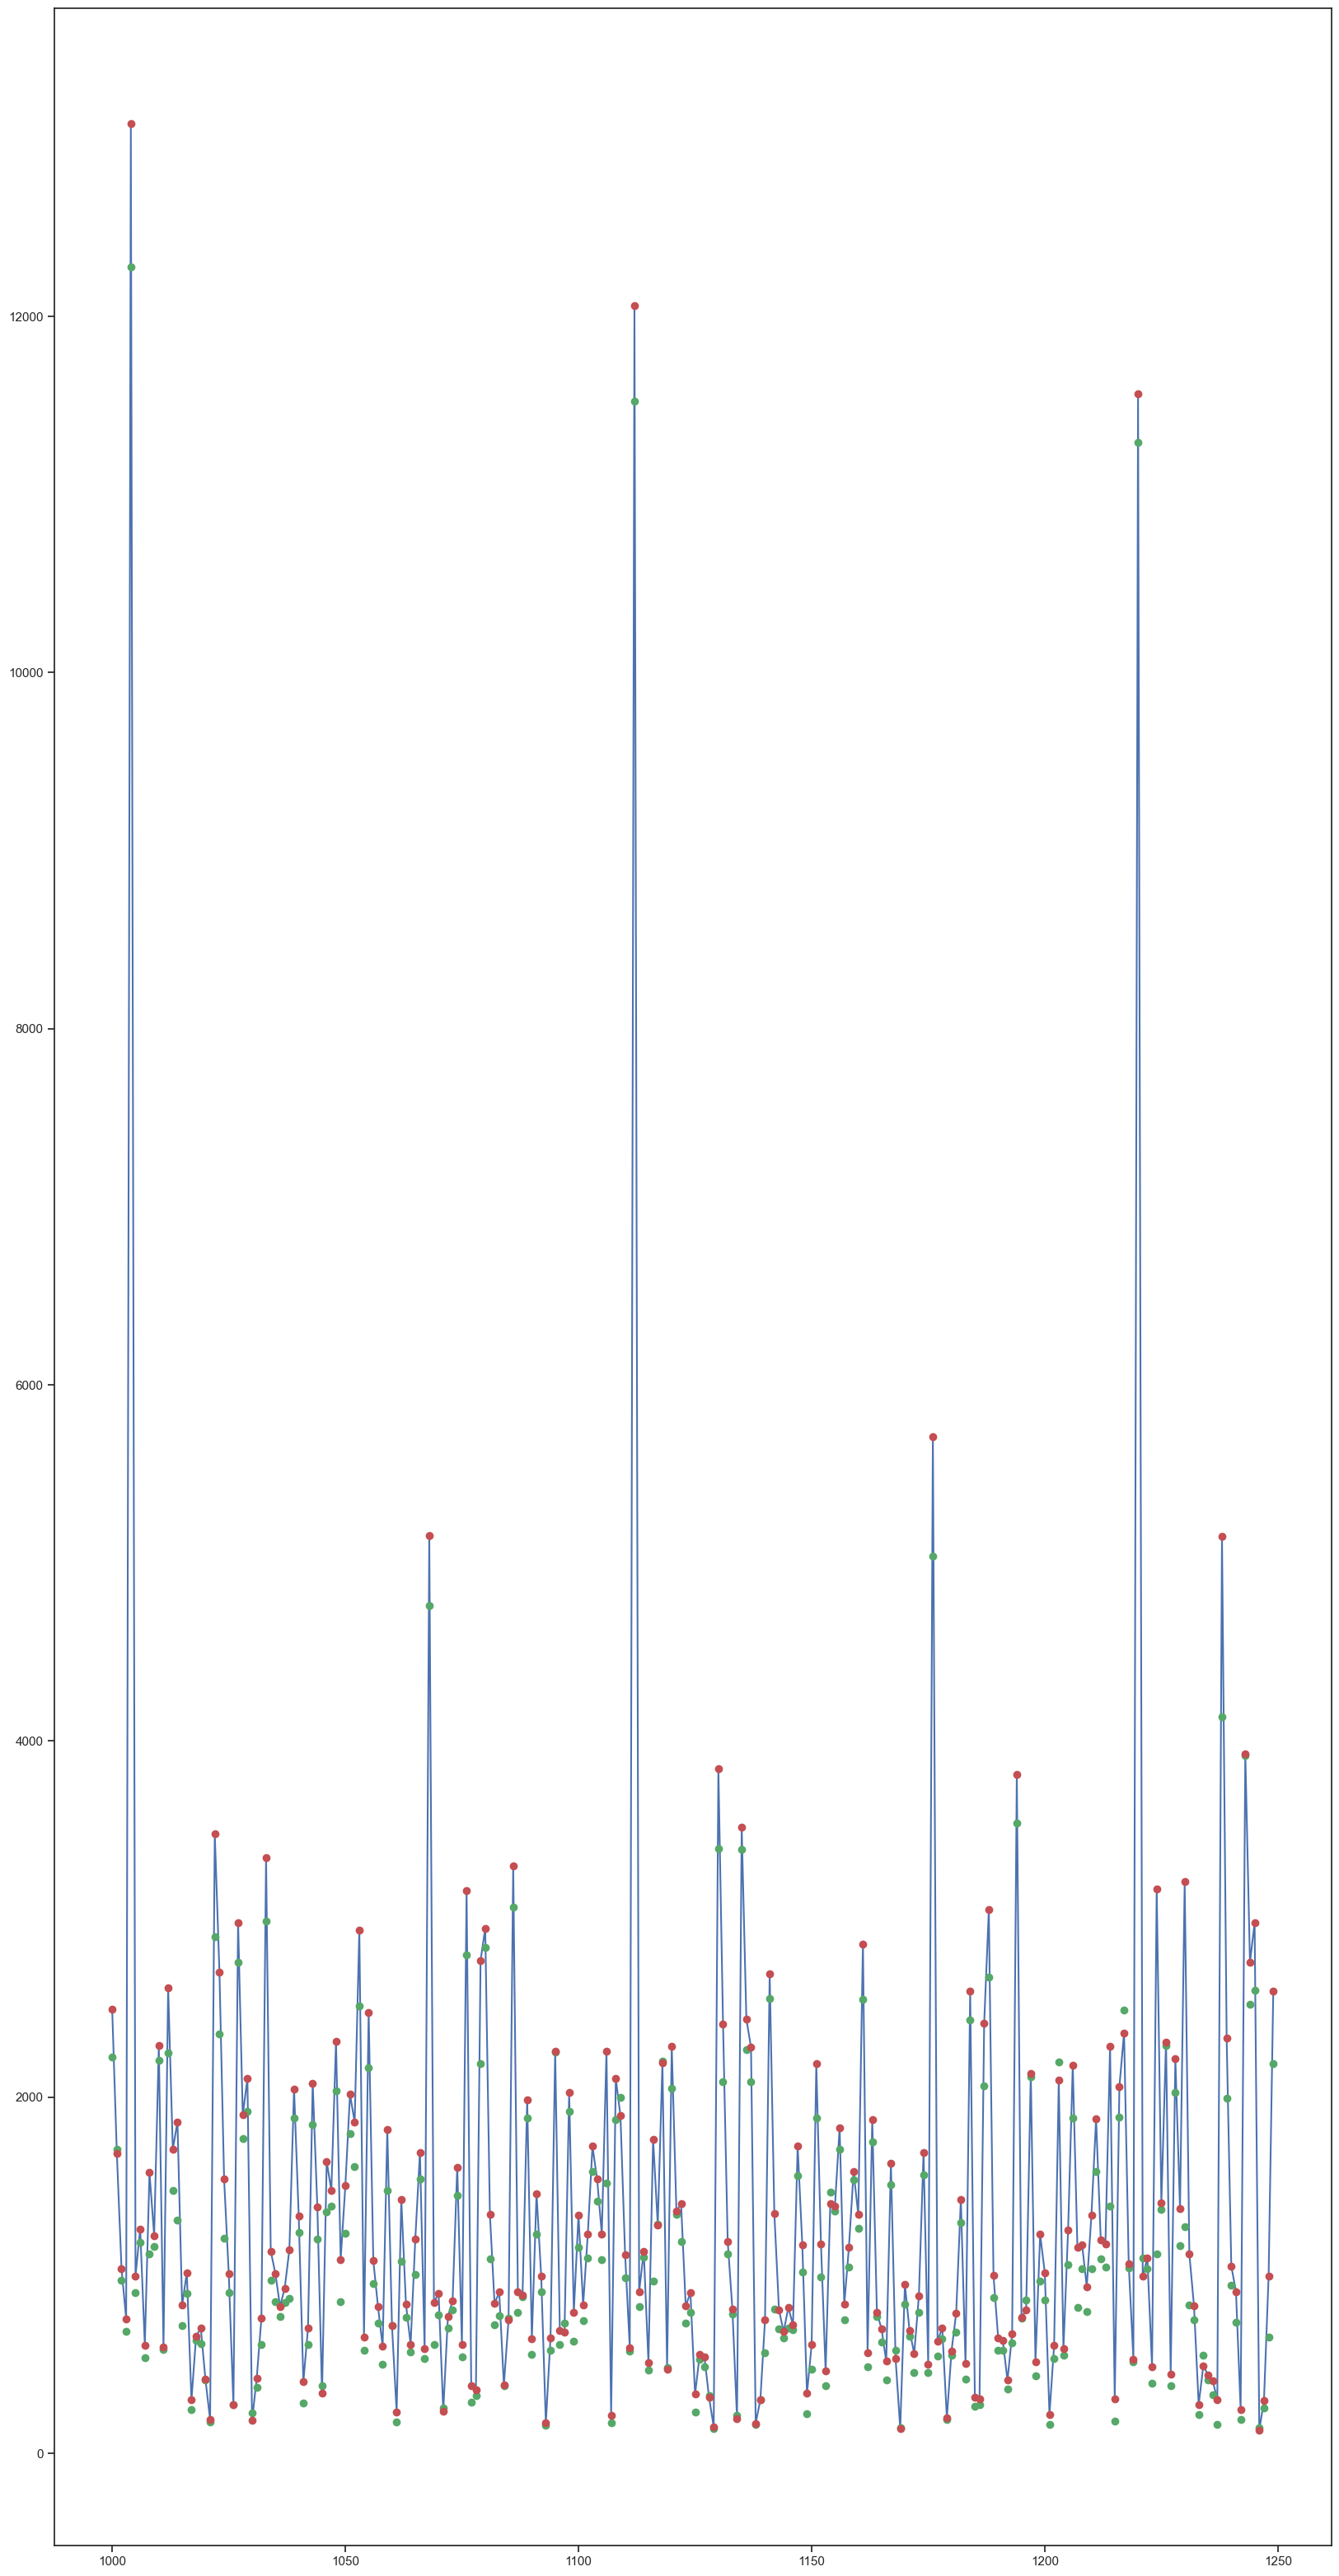

In [35]:
%matplotlib inline

f, ax = plt.subplots(figsize=(20, 40))

# Plot the actual values
plt.plot(true_data_before[1000:1250], 'b-', label='actual')

# Plot the predicted values
plt.plot(predictions_data_before[1000:1250]['Predicted'], 'go', label='prediction (Predicted)')
plt.plot(predictions_data_before[1000:1250]['Actual'], 'ro', label='prediction (Actual)')

plt.xticks(rotation='60')
plt.legend()

plt.xlabel('Samples')
plt.ylabel('Traffic')
plt.title('Actual and Predicted Values')

# 模型輸出

In [38]:
import pickle

In [40]:
with open('rforest_before.pkl', 'wb') as file:
    pickle.dump(rforest_before, file)

# 車站名與代號轉換

In [ ]:
#計算有多少種車站

In [42]:
unique_stations = tidy_full_data['Station'].unique()
print(unique_stations)

['BL板橋' '七張' '三和國中' '三民高中' '三重' '三重國小' '中山' '中山國中' '中山國小' '中正紀念堂' '丹鳳'
 '亞東醫院' '信義安和' '先嗇宮' '內湖' '公館' '六張犁' '劍南路' '劍潭' '動物園' '北投' '北門' '南京三民'
 '南京復興' '南勢角' '南港' '南港展覽館' '南港軟體園區' '古亭' '台北101/世貿' '台北小巨蛋' '台北橋' '台北車站'
 '台大醫院' '台電大樓' '唭哩岸' '善導寺' '國父紀念館' '圓山' '土城' '士林' '大坪林' '大安' '大安森林公園'
 '大橋頭站' '大湖公園' '大直' '奇岩' '小南門' '小碧潭' '市政府' '府中' '後山埤' '徐匯中學' '復興崗' '忠孝復興'
 '忠孝敦化' '忠孝新生' '忠義' '文德' '新北投' '新埔' '新店' '新店區公所' '新莊' '昆陽' '明德' '景安' '景美'
 '木柵' '東湖' '東門' '松山' '松山機場' '松江南京' '民權西路' '永安市場' '永寧' '永春' '江子翠' '海山' '淡水'
 '港墘' '石牌' '科技大樓' '竹圍' '紅樹林' '芝山' '菜寮' '萬芳社區' '萬芳醫院' '萬隆' '葫洲' '蘆洲' '行天宮'
 '西湖' '西門' '象山' '輔大' '辛亥' '迴龍' '關渡' '雙連' '頂埔' '頂溪' '頭前庄' '麟光' '龍山寺' 'Y板橋'
 '中原' '中和' '十四張' '幸福' '新北產業園區' '新埔民生' '景平' '板新' '橋和' '秀朗橋']


In [44]:
num_unique_stations = tidy_full_data['Station'].nunique()
print(num_unique_stations)

119


In [46]:
# 創建包含站點的DataFrame
unique_station = pd.DataFrame({'Station': unique_stations})

# 顯示表格
unique_station

,Station
0,BL板橋
1,七張
2,三和國中
3,三民高中
4,三重
...,...
114,新埔民生
115,景平
116,板新
117,橋和


In [47]:
#進行數值轉換並合成一表
unique_station_number = unique_station.replace({"Station": di})
unique_station_number

,Station
0,121833
1,49225
2,36471
3,35684
4,19089
...,...
114,1051
115,1499
116,1145
117,795


In [48]:
station_merged = pd.concat([unique_station, unique_station_number], axis=1)
station_merged

,Station,Station
0,BL板橋,121833
1,七張,49225
2,三和國中,36471
3,三民高中,35684
4,三重,19089
...,...,...
114,新埔民生,1051
115,景平,1499
116,板新,1145
117,橋和,795


In [49]:
station_merged.to_csv('station_merged.csv',  index=False, encoding='utf-8')

## 分割疫情時期2020~

In [50]:
tidy_full_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month
0,2017-01-01,0,BL板橋,361,7,1
1,2017-01-01,0,七張,56,7,1
2,2017-01-01,0,三和國中,52,7,1
3,2017-01-01,0,三民高中,38,7,1
4,2017-01-01,0,三重,35,7,1
...,...,...,...,...,...,...
912487,2023-01-01,5,頂埔,41,7,1
912488,2023-01-01,5,頂溪,119,7,1
912489,2023-01-01,5,頭前庄,17,7,1
912490,2023-01-01,5,麟光,24,7,1


In [51]:
import pandas as pd

# 假設 tidy_full_data 是一個 pandas DataFrame，且有 'Date' 欄位
end_date = '2019-12-31'

# 將 'Date' 欄位轉換為日期型態
tidy_full_data['Date'] = pd.to_datetime(tidy_full_data['Date'])

# 篩選 'Date' 在指定日期範圍內的資料欄位
after_data = tidy_full_data[(tidy_full_data['Date'] > end_date) ]
after_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month
827712,2020-01-01,2,BL板橋,516,3,1
827713,2020-01-01,2,七張,159,3,1
827714,2020-01-01,2,三和國中,176,3,1
827715,2020-01-01,2,三民高中,110,3,1
827716,2020-01-01,2,三重,370,3,1
...,...,...,...,...,...,...
912487,2023-01-01,5,頂埔,41,7,1
912488,2023-01-01,5,頂溪,119,7,1
912489,2023-01-01,5,頭前庄,17,7,1
912490,2023-01-01,5,麟光,24,7,1


In [52]:
train_size_after = int(len(after_data) * 0.6)
validation_size_after = int(len(after_data) * 0.2)
test_size_after = int(len(after_data) * 0.2)

train_data_after = after_data[0:train_size_after]
val_data_after = after_data[train_size_after:(train_size_after+validation_size_after)]
test_data_after = after_data[(train_size_after+validation_size_after):len(after_data)]

In [53]:
train_data_after = train_data_after.replace({"Station": di})
train_data_after = train_data_after.drop(['Date'],axis=1)

test_data_after = test_data_after.replace({"Station": di})
test_data_after = test_data_after.drop(['Date'],axis=1)

val_data_after = val_data_after.replace({"Station": di})
val_data_after = val_data_after.drop(['Date'],axis=1)
train_data_after

,Hour,Station,CrowdFlow,DayofWeek,Month
827712,2,121833,516,3,1
827713,2,49225,159,3,1
827714,2,36471,176,3,1
827715,2,35684,110,3,1
827716,2,19089,370,3,1
...,...,...,...,...,...
728816,17,144025,3032,2,10
728817,17,107025,2464,2,10
728818,17,98337,2826,2,10
728819,17,8586,287,2,10


In [54]:
X_train_after = train_data_after.drop(['CrowdFlow'],axis=1)
y_train_after = train_data_after['CrowdFlow']
X_test_after = test_data_after.drop(['CrowdFlow'],axis=1)
y_test_after = test_data_after['CrowdFlow']
X_val_after = val_data_after.drop(['CrowdFlow'],axis=1)
y_val_after = val_data_after['CrowdFlow']

In [55]:
num_unique_stations_after = X_train_after['Station'].nunique()
print(num_unique_stations_after)

119


In [56]:
X_train_after = np.array(X_train_after)
X_test_after = np.array(X_test_after)
y_train_after = np.array(y_train_after)
y_test_after = np.array(y_test_after)
X_val_after = np.array(X_val_after)
y_val_after = np.array(y_val_after)

from sklearn.ensemble import RandomForestRegressor

rforest_after = RandomForestRegressor(n_estimators = 100, min_samples_split=10,random_state = 0)
rforest_after.fit(X_train_after, y_train_after)

RandomForestRegressor(min_samples_split=10, random_state=0)

In [57]:
predictions_after = rforest_after.predict(X_val_after)

#R Square
import statsmodels.api as sm
X_addC_after = sm.add_constant(predictions_after)
result_after = sm.OLS(y_val_after, X_addC_after).fit()
print(result_after.rsquared, result_after.rsquared_adj)

0.9333981588301808 0.9333980373114925


In [58]:
#RMSE
from sklearn.metrics import mean_squared_error
import math
#First model
print(mean_squared_error(y_val_after, predictions_after))
print(math.sqrt(mean_squared_error(y_val_after, predictions_after)))

94917.06521264894
308.08613278213113


In [59]:
true_data_after = pd.DataFrame(data = y_val_after)

predictions_data_after = pd.DataFrame(data = predictions_after)

combined_after = predictions_data_after
combined_after['Actual'] = true_data_after[0]
combined_after.rename(columns = {0: 'Predicted'}, inplace = True)
random_combined_after = combined_after.sample(n=250, random_state=1)
random_combined_after.head(20)

,Predicted,Actual
483136,2384.861773,1550
209572,369.355809,278
17647,159.165545,178
453625,8.154533,6
4175,149.660457,135
278385,234.116315,107
433184,442.100186,382
122400,1787.388549,1742
377771,983.376662,982
527404,1085.444309,814


ValueError: rotation must be 'vertical', 'horizontal' or a number, not 60

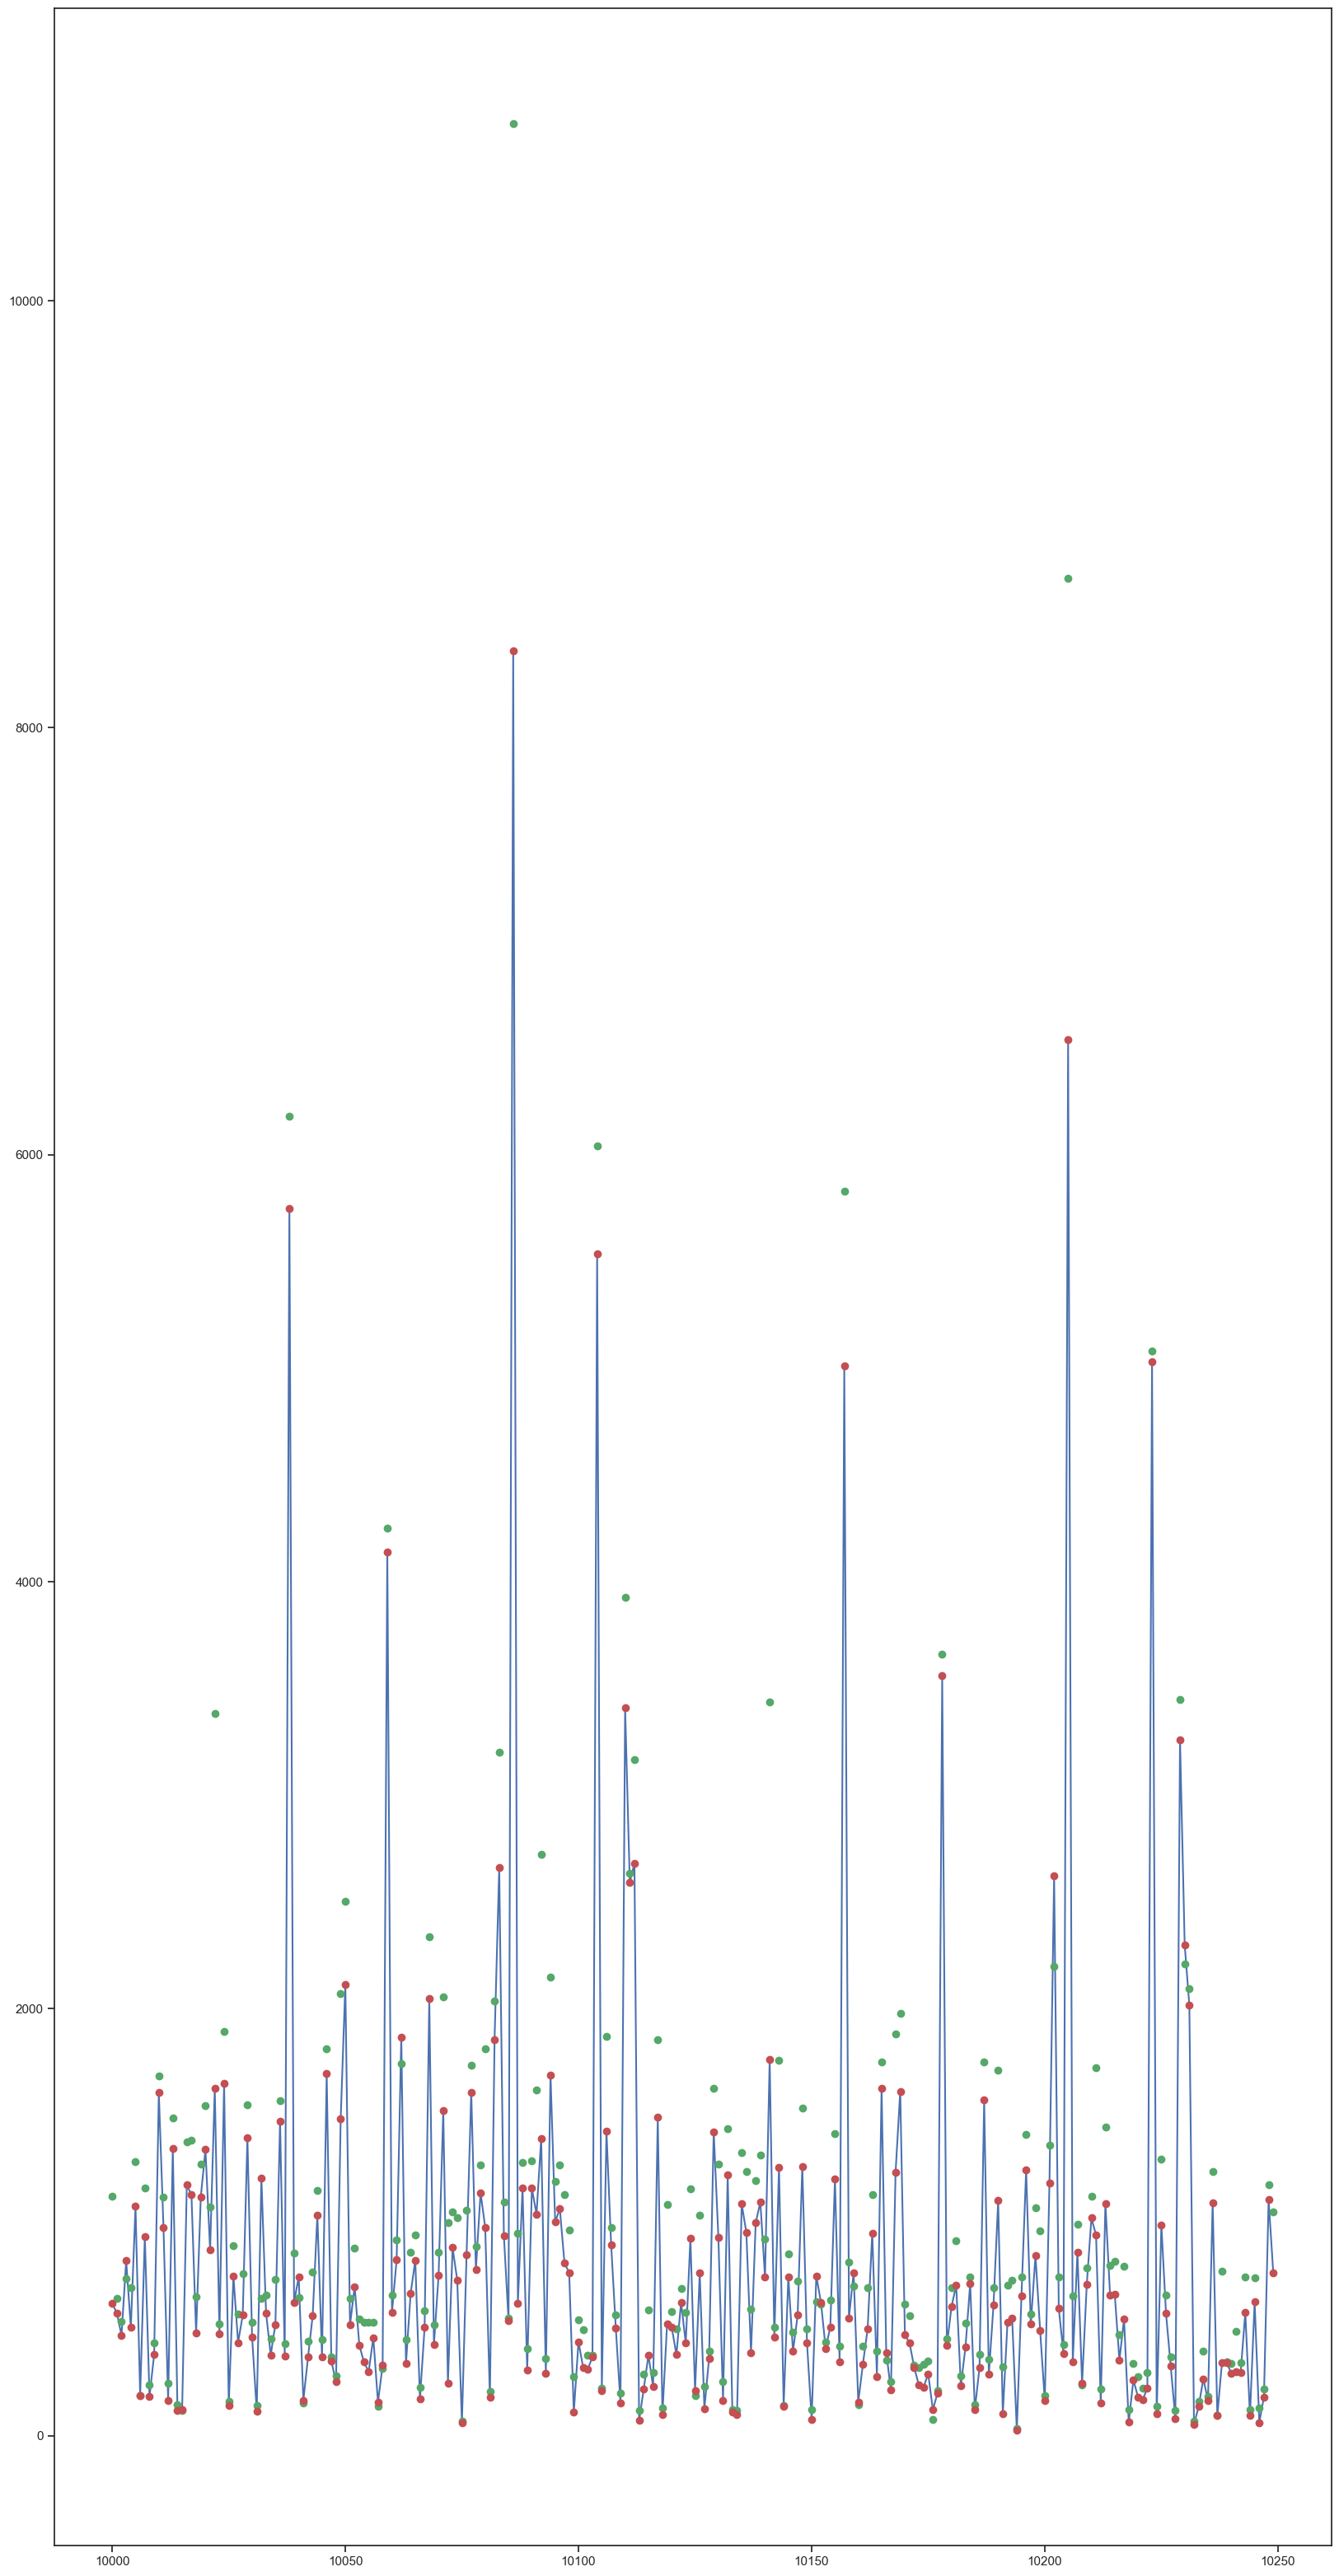

In [109]:
%matplotlib inline

f, ax = plt.subplots(figsize=(20, 40))

# Plot the actual values
plt.plot(true_data_after[10000:10250], 'b-', label='actual')

# Plot the predicted values
plt.plot(predictions_data_after[10000:10250]['Predicted'], 'go', label='prediction (Predicted)')
plt.plot(predictions_data_after[10000:10250]['Actual'], 'ro', label='prediction (Actual)')

plt.xticks(rotation='60')
plt.legend()

plt.xlabel('Samples')
plt.ylabel('Traffic')
plt.title('Actual and Predicted Values')

# 模型輸出

In [62]:
with open('rforest_after.pkl', 'wb') as file:
    pickle.dump(rforest_after, file)

# 測試模型

In [ ]:
#建立虛假表格滿足X需求,時,車站,星期,月份

In [82]:
data = {
    'Hour': range(24),
    'Station': [121833] * 24,
    'DayofWeek': [1] * 24,
    'Month': [1] * 24
}

# 建立 DataFrame
df = pd.DataFrame(data)

# 顯示表格
df

,Hour,Station,DayofWeek,Month
0,0,121833,1,1
1,1,121833,1,1
2,2,121833,1,1
3,3,121833,1,1
4,4,121833,1,1
5,5,121833,1,1
6,6,121833,1,1
7,7,121833,1,1
8,8,121833,1,1
9,9,121833,1,1


In [64]:
# 載入模型
import pickle

with open('rforest_before.pkl', 'rb') as file:
    clf = pickle.load(file)

In [83]:
feature_columns = ['Hour', 'Station', 'DayofWeek', 'Month']
predictions_test = clf.predict(df[feature_columns])
predictions_test

C:\Users\student\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([1.94513744e+02, 2.12829431e+00, 1.68744191e+03, 5.55650800e+02,
       3.98764284e+02, 1.58346733e+01, 4.33193091e+02, 1.88066632e+03,
       4.48058587e+03, 2.50016684e+03, 1.86469235e+03, 1.84021199e+03,
       1.90558689e+03, 2.03285576e+03, 2.03601024e+03, 1.93146424e+03,
       2.00133576e+03, 2.62840333e+03, 3.32579695e+03, 2.52026650e+03,
       1.84364558e+03, 1.85630177e+03, 1.63021242e+03, 7.76968310e+02])

In [84]:
formatted_predictions = ["{:.2f}".format(prediction) for prediction in predictions_test]
# 建立包含 formatted_predictions 的 DataFrame
df_predictions = pd.DataFrame({'Predictions': formatted_predictions})
df_predictions

,Predictions
0,194.51
1,2.13
2,1687.44
3,555.65
4,398.76
5,15.83
6,433.19
7,1880.67
8,4480.59
9,2500.17


In [85]:
df_merged = pd.concat([df["Hour"], df_predictions], axis=1)
df_merged

,Hour,Predictions
0,0,194.51
1,1,2.13
2,2,1687.44
3,3,555.65
4,4,398.76
5,5,15.83
6,6,433.19
7,7,1880.67
8,8,4480.59
9,9,2500.17


In [87]:
df_out = df_merged.drop(df_merged[(df_merged["Hour"] > 0) & (df_merged["Hour"] < 6)].index)
df_out

,Hour,Predictions
0,0,194.51
6,6,433.19
7,7,1880.67
8,8,4480.59
9,9,2500.17
10,10,1864.69
11,11,1840.21
12,12,1905.59
13,13,2032.86
14,14,2036.01


In [98]:
df_out['Hour'] = df_out['Hour'].astype(int)
df_out['Predictions'] = df_out['Predictions'].astype(float)

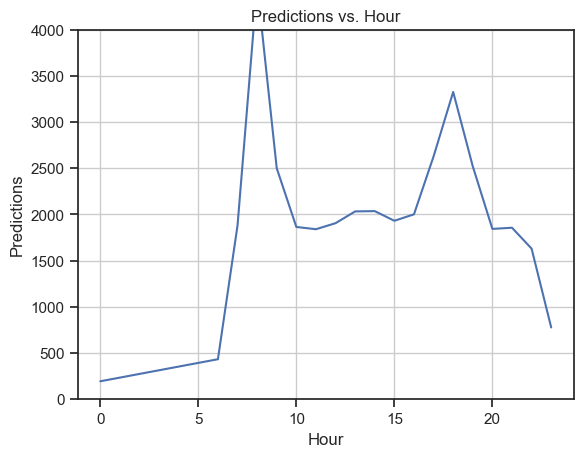

In [99]:
import matplotlib.pyplot as plt

# 提取排序和过滤后的数据
hours = df_out["Hour"]
predictions = df_out["Predictions"]

# 绘制折线图
plt.plot(hours, predictions)
plt.xlabel("Hour")
plt.ylabel("Predictions")
plt.title("Predictions vs. Hour")
plt.grid(True)

# 设置 Y 轴的上下限值
plt.ylim(0,4000)  # 设置 Y 轴的范围为 0 到 4000

plt.show()

In [100]:
with open('rforest_drive.pkl', 'rb') as file:
    clf_COV = pickle.load(file)

In [102]:
feature_columns = ['Hour', 'Station', 'DayofWeek', 'Month']
predictions_test_02 = clf_COV.predict(df[feature_columns])
predictions_test_02

C:\Users\student\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([1.71895702e+02, 1.94751015e+00, 6.67273720e+02, 3.48217279e+02,
       2.49453713e+02, 6.98066897e-01, 4.30411509e+02, 2.24791207e+03,
       5.31968274e+03, 3.00307643e+03, 1.83220488e+03, 1.68052225e+03,
       1.75908131e+03, 1.86046756e+03, 1.78198805e+03, 1.65404088e+03,
       1.78784355e+03, 2.48331787e+03, 3.35036145e+03, 2.46819510e+03,
       1.65947726e+03, 1.63859745e+03, 1.37704520e+03, 6.44939473e+02])

In [103]:
formatted_predictions_02 = ["{:.2f}".format(prediction) for prediction in predictions_test_02]
# 建立包含 formatted_predictions 的 DataFrame
df_predictions_02 = pd.DataFrame({'Predictions': formatted_predictions_02})
df_predictions_02

,Predictions
0,171.90
1,1.95
2,667.27
3,348.22
4,249.45
5,0.70
6,430.41
7,2247.91
8,5319.68
9,3003.08


In [104]:
df_merged_02 = pd.concat([df["Hour"], df_predictions_02], axis=1)
df_merged_02

,Hour,Predictions
0,0,171.90
1,1,1.95
2,2,667.27
3,3,348.22
4,4,249.45
5,5,0.70
6,6,430.41
7,7,2247.91
8,8,5319.68
9,9,3003.08


In [105]:
df_out_02 = df_merged_02.drop(df_merged_02[(df_merged_02["Hour"] > 0) & (df_merged_02["Hour"] < 6)].index)
df_out_02

,Hour,Predictions
0,0,171.90
6,6,430.41
7,7,2247.91
8,8,5319.68
9,9,3003.08
10,10,1832.20
11,11,1680.52
12,12,1759.08
13,13,1860.47
14,14,1781.99


In [106]:
df_out_02['Hour'] = df_out_02['Hour'].astype(int)
df_out_02['Predictions'] = df_out_02['Predictions'].astype(float)

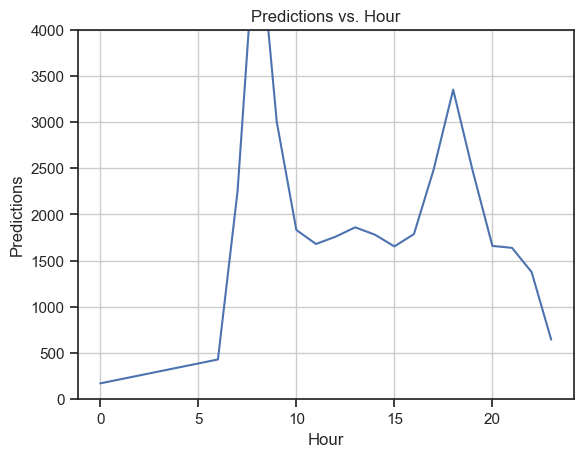

In [107]:
import matplotlib.pyplot as plt

# 提取排序和过滤后的数据
hours = df_out_02["Hour"]
predictions = df_out_02["Predictions"]

# 绘制折线图
plt.plot(hours, predictions)
plt.xlabel("Hour")
plt.ylabel("Predictions")
plt.title("Predictions vs. Hour")
plt.grid(True)

# 设置 Y 轴的上下限值
plt.ylim(0,4000)  # 设置 Y 轴的范围为 0 到 4000

plt.show()

# XGBOOST

In [6]:
tidy_full_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month
0,2017-01-01,0,BL板橋,361,7,1
1,2017-01-01,0,七張,56,7,1
2,2017-01-01,0,三和國中,52,7,1
3,2017-01-01,0,三民高中,38,7,1
4,2017-01-01,0,三重,35,7,1
...,...,...,...,...,...,...
5224402,2023-01-01,5,頂埔,41,7,1
5224403,2023-01-01,5,頂溪,119,7,1
5224404,2023-01-01,5,頭前庄,17,7,1
5224405,2023-01-01,5,麟光,24,7,1


In [9]:
filtered_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month
0,2017-01-01,0,BL板橋,361,7,1
1,2017-01-01,0,七張,56,7,1
2,2017-01-01,0,三和國中,52,7,1
3,2017-01-01,0,三民高中,38,7,1
4,2017-01-01,0,三重,35,7,1
...,...,...,...,...,...,...
2483995,2019-12-31,23,頂埔,259,2,12
2483996,2019-12-31,23,頂溪,1219,2,12
2483997,2019-12-31,23,頭前庄,189,2,12
2483998,2019-12-31,23,麟光,130,2,12


In [10]:
train_size_before = int(len(filtered_data) * 0.6)
validation_size_before = int(len(filtered_data) * 0.2)
test_size_before = int(len(filtered_data) * 0.2)

train_data_before = filtered_data[0:train_size_before]
val_data_before = filtered_data[train_size_before:(train_size_before+validation_size_before)]
test_data_before = filtered_data[(train_size_before+validation_size_before):len(filtered_data)]

In [11]:
train_data_before = train_data_before.replace({"Station": di})
train_data_before = train_data_before.drop(['Date'],axis=1)

test_data_before = test_data_before.replace({"Station": di})
test_data_before = test_data_before.drop(['Date'],axis=1)

val_data_before = val_data_before.replace({"Station": di})
val_data_before = val_data_before.drop(['Date'],axis=1)
train_data_before

,Hour,Station,CrowdFlow,DayofWeek,Month
0,0,121833,361,7,1
1,0,49225,56,7,1
2,0,36471,52,7,1
3,0,35684,38,7,1
4,0,19089,35,7,1
...,...,...,...,...,...
1490395,0,24874,29,6,10
1490396,0,105942,207,6,10
1490397,0,15587,29,6,10
1490398,0,12977,30,6,10


In [12]:
X_train_before = train_data_before.drop(['CrowdFlow'],axis=1)
y_train_before = train_data_before['CrowdFlow']
X_test_before = test_data_before.drop(['CrowdFlow'],axis=1)
y_test_before = test_data_before['CrowdFlow']
X_val_before = val_data_before.drop(['CrowdFlow'],axis=1)
y_val_before = val_data_before['CrowdFlow']

In [13]:
import xgboost as xgb

In [14]:
# 创建模型
model = xgb.XGBRegressor()
# 训练模型
model.fit(X_train_before, y_train_before)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
from sklearn.metrics import mean_squared_error
# 预测
y_pred_before = model.predict(X_test_before)

# 计算均方根误差（RMSE）
rmse = mean_squared_error(y_test_before, y_pred_before, squared=False)
print("模型的均方根误差（RMSE）：", rmse)

模型的均方根误差（RMSE）： 320.46822432193187


In [25]:
predictions_before =model.predict(X_val_before)

#R Square
import statsmodels.api as sm
X_addC_before = sm.add_constant(predictions_before)
result_before = sm.OLS(y_val_before, X_addC_before).fit()
print(result_before.rsquared, result_before.rsquared_adj)

0.9331564058489675 0.9331562713001285


In [17]:
predictions = model.predict(X_val_before)
print("预测结果：", predictions)

预测结果： [ -1.4383569  57.65719    71.79128   ... 119.90279    68.36638
 888.52747  ]


In [71]:
data = {
    'Hour': range(24),
    'Station': [121833] * 24,
    'DayofWeek': [1] * 24,
    'Month': [1] * 24
}

# 建立 DataFrame
df = pd.DataFrame(data)

# 顯示表格
df

,Hour,Station,DayofWeek,Month
0,0,121833,1,1
1,1,121833,1,1
2,2,121833,1,1
3,3,121833,1,1
4,4,121833,1,1
5,5,121833,1,1
6,6,121833,1,1
7,7,121833,1,1
8,8,121833,1,1
9,9,121833,1,1


In [19]:
feature_columns = ['Hour', 'Station', 'DayofWeek', 'Month']
predictions_test = model.predict(df[feature_columns])
predictions_test

array([ 2.1599161e+02,  5.8385267e+00,  5.0192859e+02,  5.0192859e+02,
        5.0192859e+02, -4.6057186e+00,  4.1353174e+02,  1.9350913e+03,
        4.6103628e+03,  2.6884895e+03,  1.9497169e+03,  1.7318188e+03,
        1.7128350e+03,  1.9165924e+03,  1.8841489e+03,  1.6998029e+03,
        1.8222609e+03,  2.3743191e+03,  3.4789448e+03,  2.0705566e+03,
        1.4474801e+03,  1.4993944e+03,  1.4320093e+03,  3.1428714e+02],
      dtype=float32)

In [20]:
formatted_predictions = ["{:.2f}".format(prediction) for prediction in predictions_test]
# 建立包含 formatted_predictions 的 DataFrame
df_predictions = pd.DataFrame({'Predictions': formatted_predictions})
df_predictions

,Predictions
0,215.99
1,5.84
2,501.93
3,501.93
4,501.93
5,-4.61
6,413.53
7,1935.09
8,4610.36
9,2688.49


In [21]:
df_merged = pd.concat([df["Hour"], df_predictions], axis=1)
df_merged

,Hour,Predictions
0,0,215.99
1,1,5.84
2,2,501.93
3,3,501.93
4,4,501.93
5,5,-4.61
6,6,413.53
7,7,1935.09
8,8,4610.36
9,9,2688.49


In [22]:
df_out = df_merged.drop(df_merged[(df_merged["Hour"] > 0) & (df_merged["Hour"] < 6)].index)
df_out

,Hour,Predictions
0,0,215.99
6,6,413.53
7,7,1935.09
8,8,4610.36
9,9,2688.49
10,10,1949.72
11,11,1731.82
12,12,1712.83
13,13,1916.59
14,14,1884.15


In [23]:
df_out['Hour'] = df_out['Hour'].astype(int)
df_out['Predictions'] = df_out['Predictions'].astype(float)

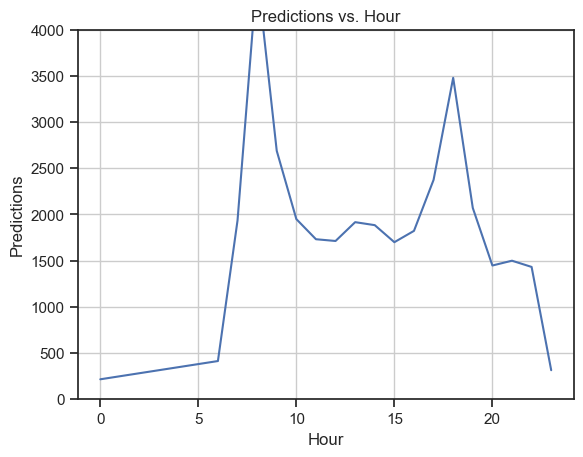

In [24]:
import matplotlib.pyplot as plt

# 提取排序和过滤后的数据
hours = df_out["Hour"]
predictions = df_out["Predictions"]

# 绘制折线图
plt.plot(hours, predictions)
plt.xlabel("Hour")
plt.ylabel("Predictions")
plt.title("Predictions vs. Hour")
plt.grid(True)

# 设置 Y 轴的上下限值
plt.ylim(0,4000)  # 设置 Y 轴的范围为 0 到 4000

plt.show()

# 多層感知機

# 邏輯思考~是否全部需視為類別
## data.drop /hour

In [13]:
import pandas as pd

# 假設 tidy_full_data 是一個 pandas DataFrame，且有 'Date' 欄位
start_date = '2017-01-01'
end_date = '2019-12-31'

# 將 'Date' 欄位轉換為日期型態
tidy_full_data['Date'] = pd.to_datetime(tidy_full_data['Date'])

# 篩選 'Date' 在指定日期範圍內的資料欄位
filtered_data = tidy_full_data[(tidy_full_data['Date'] >= start_date) & (tidy_full_data['Date'] <= end_date)]
filtered_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month
0,2017-01-01,0,BL板橋,361,7,1
1,2017-01-01,0,七張,56,7,1
2,2017-01-01,0,三和國中,52,7,1
3,2017-01-01,0,三民高中,38,7,1
4,2017-01-01,0,三重,35,7,1
...,...,...,...,...,...,...
2483995,2019-12-31,23,頂埔,259,2,12
2483996,2019-12-31,23,頂溪,1219,2,12
2483997,2019-12-31,23,頭前庄,189,2,12
2483998,2019-12-31,23,麟光,130,2,12


In [16]:
#轉成單熱編碼確保為類型資料
encoded_df = pd.get_dummies(filtered_data, columns=["Hour", "Station", "DayofWeek", "Month"])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
encoded_df.head(100)

,Date,CrowdFlow,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Station_BL板橋,Station_七張,Station_三和國中,Station_三民高中,Station_三重,Station_三重國小,Station_中山,Station_中山國中,Station_中山國小,Station_中正紀念堂,Station_丹鳳,Station_亞東醫院,Station_信義安和,Station_先嗇宮,Station_內湖,Station_公館,Station_六張犁,Station_劍南路,Station_劍潭,Station_動物園,Station_北投,Station_北門,Station_南京三民,Station_南京復興,Station_南勢角,Station_南港,Station_南港展覽館,Station_南港軟體園區,Station_古亭,Station_台北101/世貿,Station_台北小巨蛋,Station_台北橋,Station_台北車站,Station_台大醫院,Station_台電大樓,Station_唭哩岸,Station_善導寺,Station_國父紀念館,Station_圓山,Station_土城,Station_士林,Station_大坪林,Station_大安,Station_大安森林公園,Station_大橋頭站,Station_大湖公園,Station_大直,Station_奇岩,Station_小南門,Station_小碧潭,Station_市政府,Station_府中,Station_後山埤,Station_徐匯中學,Station_復興崗,Station_忠孝復興,Station_忠孝敦化,Station_忠孝新生,Station_忠義,Station_文德,Station_新北投,Station_新埔,Station_新店,Station_新店區公所,Station_新莊,Station_昆陽,Station_明德,Station_景安,Station_景美,Station_木柵,Station_東湖,Station_東門,Station_松山,Station_松山機場,Station_松江南京,Station_民權西路,Station_永安市場,Station_永寧,Station_永春,Station_江子翠,Station_海山,Station_淡水,Station_港墘,Station_石牌,Station_科技大樓,Station_竹圍,Station_紅樹林,Station_芝山,Station_菜寮,Station_萬芳社區,Station_萬芳醫院,Station_萬隆,Station_葫洲,Station_蘆洲,Station_行天宮,Station_西湖,Station_西門,Station_象山,Station_輔大,Station_辛亥,Station_迴龍,Station_關渡,Station_雙連,Station_頂埔,Station_頂溪,Station_頭前庄,Station_麟光,Station_龍山寺,DayofWeek_1,DayofWeek_2,DayofWeek_3,DayofWeek_4,DayofWeek_5,DayofWeek_6,DayofWeek_7,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2017-01-01,361,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
5,2017-01-01,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
6,2017-01-01,441,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
7,2017-01-01,85,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [39]:
df_MLP = encoded_df
df_MLP

,Date,CrowdFlow,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2017-01-01,361,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,56,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,52,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,38,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,35,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483995,2019-12-31,259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2483996,2019-12-31,1219,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2483997,2019-12-31,189,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2483998,2019-12-31,130,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
train_size_df_MLP = int(len(df_MLP) * 0.6)
validation_size_df_MLP = int(len(df_MLP) * 0.2)
test_size_df_MLP = int(len(df_MLP) * 0.2)

train_data_df_MLP = df_MLP[0:train_size_df_MLP]
val_data_df_MLP = df_MLP[train_size_df_MLP:(train_size_df_MLP+validation_size_df_MLP)]
test_data_df_MLP = df_MLP[(train_size_df_MLP+validation_size_df_MLP):len(df_MLP)]

In [42]:
X_train_df_MLP = train_data_df_MLP.drop(['CrowdFlow'],axis=1)
y_train_df_MLP = train_data_df_MLP['CrowdFlow']
X_test_df_MLP = test_data_df_MLP.drop(['CrowdFlow'],axis=1)
y_test_df_MLP = test_data_df_MLP['CrowdFlow']
X_val_df_MLP = val_data_df_MLP.drop(['CrowdFlow'],axis=1)
y_val_df_MLP = val_data_df_MLP['CrowdFlow']

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import sklearn
import os
sns.set()
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [44]:
X_train_df_MLP = X_train_df_MLP.drop("Date", axis=1)
X_test_df_MLP = X_test_df_MLP.drop("Date", axis=1)
X_val_df_MLP = X_val_df_MLP.drop("Date", axis=1)

In [61]:
model = Sequential()                  # 定義模型

In [54]:
# model.add(Dense(50, input_shape=(151,),activation='relu') )
# model.add(Dense(30, input_shape=(50,),activation='relu') )
# model.add(Dense(10, input_shape=(30,),activation='relu') )
# model.add(Dense(6, input_shape=(10,),activation='relu') )
# model.add(Dense(1, input_shape=(6,), activation='linear'))

In [ ]:
# 移除最后一层
model.pop()
# 移除指定索引的层
model.layers.pop(1)

# 更新输入和输出张量的连接
model.build()

# 打印模型结构
model.summary()

In [14]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy

In [ ]:
# 定义模型
model.add(Dense(64, activation='relu', input_shape=(X_train_df_MLP.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1) )  # 输出层不使用激活函数

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                9728      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 13,953
Trainable params: 13,953
Non-trainable params: 0
_________________________________________________________________


In [68]:
# 编译模型
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

# 训练模型
model.fit(X_train_df_MLP, y_train_df_MLP, epochs=10, batch_size=32)

Epoch 1/10
46575/46575 [==============================] - 119s 3ms/step - loss: 67645.5078 - mae: 107.3138
Epoch 2/10
46575/46575 [==============================] - 134s 3ms/step - loss: 64836.5977 - mae: 103.5404
Epoch 3/10
46575/46575 [==============================] - 129s 3ms/step - loss: 63774.4688 - mae: 101.9069
Epoch 4/10
46575/46575 [==============================] - 132s 3ms/step - loss: 63124.5039 - mae: 100.8887
Epoch 5/10
46575/46575 [==============================] - 133s 3ms/step - loss: 62633.0195 - mae: 100.0946
Epoch 6/10
46575/46575 [==============================] - 126s 3ms/step - loss: 62302.9102 - mae: 99.6922
Epoch 7/10
46575/46575 [==============================] - 135s 3ms/step - loss: 62022.5078 - mae: 99.1841
Epoch 8/10
46575/46575 [==============================] - 135s 3ms/step - loss: 61796.4414 - mae: 98.7807
Epoch 9/10
46575/46575 [==============================] - 121s 3ms/step - loss: 61610.6133 - mae: 98.4113
Epoch 10/10
46575/46575 [================

In [73]:
predictions =model.predict(X_val_df_MLP)

#R Square
import statsmodels.api as sm
X_addC = sm.add_constant(predictions)
result = sm.OLS(y_val_df_MLP, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

15525/15525 [==============================] - 18s 1ms/step
0.9475386724872576 0.9475385668883471


In [74]:
#RMSE
from sklearn.metrics import mean_squared_error
import math
#First model
print(mean_squared_error(y_val_df_MLP, predictions))
print(math.sqrt(mean_squared_error(y_val_df_MLP, predictions)))

92282.83148622474
303.78089387949456


In [102]:
# predictions_data_df_MLP.numpy()

AttributeError: 'DataFrame' object has no attribute 'numpy'

In [96]:
true_data_df_MLP = pd.DataFrame(data = y_val_df_MLP)

predictions_data_df_MLP = pd.DataFrame(data = predictions)
true_data_df_MLP.reset_index(inplace=True)
predictions_data_df_MLP.reset_index(inplace=True)

In [97]:
combined_df_MLP = pd.concat([true_data_df_MLP, predictions_data_df_MLP], axis=1)

In [98]:
random_combined_df_MLP = combined_df_MLP.sample(n=250, random_state=1)
random_combined_df_MLP.head(20)

,index,CrowdFlow,index,0
206515,1696915,29,206515,66.050278
420316,1910716,1471,420316,1371.112671
459505,1949905,348,459505,391.767883
446886,1937286,199,446886,331.083282
482222,1972622,349,482222,386.972656
359278,1849678,965,359278,956.292114
209736,1700136,3138,209736,2495.885010
195036,1685436,5306,195036,5401.986816
103145,1593545,364,103145,413.157501
347800,1838200,2531,347800,2719.167236
